In [1]:
import sys, os
sys.path.insert(0,'/Users/mbbssnw3/Dropbox (The University of Manchester)/ACTIVE/COURSE--OptContFinance/code/stochastic_control')

In [2]:
import numpy as np
from stochastic_control.bandits.bandits import *
from time import time
from IPython.display import clear_output

In [300]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# SAMBA no cooling

- Add number of times each arm is tried
- Add total reward from each arm

In [767]:
probs = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

In [768]:
Ps = dict()
for alp in [0.001, 0.01, 0.1, 0.5]:
    bandit = samba_bandit(len(probs),alpha=alp)
    Arms = Bernoulli_multiarm(probs)
    samba_probs = []
    Time = 1000000
    for _ in range(Time):
        arm = bandit.act()
        reward = Arms[arm].pull()
        bandit.train(arm,reward)
        samba_probs.append(np.array(bandit.probs))
    Arms.rewards()
    print(np.sum(Arms.rewards()))
    Ps[alp] = [1-samba_probs[i][0] for i in range(len(samba_probs))]

869221.0
895714.0
899276.0
799583.0


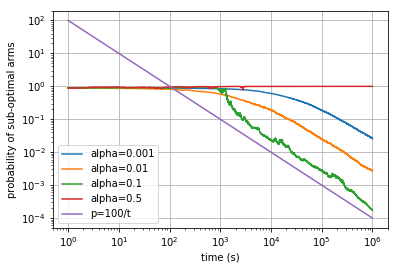

In [771]:
import matplotlib
import matplotlib.pyplot as plt

# Data for plotting
t = np.arange(1, Time+1, 1)

fig, ax = plt.subplots()
ax.loglog(t, Ps[0.001], label='alpha=0.001')#, t, Ps[0.01], t, Ps[0.1], t, Ps[0.5], t, 100/t)
ax.loglog(t, Ps[0.01], label='alpha=0.01')
ax.loglog(t, Ps[0.1], label='alpha=0.1')
ax.loglog(t, Ps[0.5], label='alpha=0.5')
ax.loglog(t, 100/t, label='p=100/t')
ax.set(xlabel='time (s)', ylabel='probability of sub-optimal arms')#, title='SAMBA without cooling')
ax.grid()
plt.legend()

fig.savefig("SAMBA_no_cool.pdf", format='pdf', dpi=1000)
fig.savefig('destination_path.eps', format='eps', dpi=1000)
plt.show()

In [248]:
Ps08 = [1-samba_probs[i][0] for i in range(len(samba_probs))]

# SAMBA with Cooling

In [760]:
probs = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

In [761]:
Ps = dict()
alphas = [0.01, 0.1, 1.]
for alp in alphas:
    bandit = samba_bandit(len(probs),alpha=alp, cooling=True)
    Arms = Bernoulli_multiarm(probs)
    samba_probs = []
    Time = 1000000
    for _ in range(Time):
        arm = bandit.act()
        reward = Arms[arm].pull()
        bandit.train(arm,reward)
        samba_probs.append(np.array(bandit.probs))
    Arms.rewards()
    print(np.sum(Arms.rewards()))
    Ps[alp] = [1-samba_probs[i][0] for i in range(len(samba_probs))]

881280.0
896582.0
899330.0


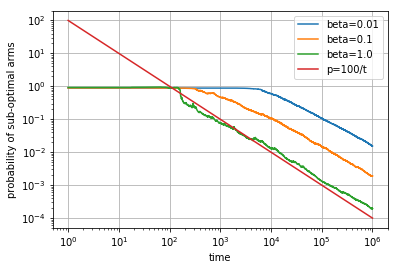

In [766]:
import matplotlib
import matplotlib.pyplot as plt

# Data for plotting
t = np.arange(1, Time+1, 1)

fig, ax = plt.subplots()
for alp in alphas:
    ax.loglog(t, Ps[alp], label='beta='+str(alp))#, t, Ps[0.01], t, Ps[0.1], t, Ps[0.5], t, 100/t)
# ax.loglog(t, Ps[0.01], label='alpha=0.01')
# ax.loglog(t, Ps[0.1], label='alpha=0.1')
# ax.loglog(t, Ps[0.5], label='alpha=0.5')
ax.loglog(t, 100/t, label='p=100/t')
ax.set(xlabel='time', ylabel='probability of sub-optimal arms')#, title='SAMBA with cooling')
ax.grid()
plt.legend()

fig.savefig("test.png")
fig.savefig("test.pdf", format='pdf', dpi=1000)
fig.savefig('destination_path.eps', format='eps', dpi=1000)
plt.show()

## 5 random arms

In [310]:
probs = [ [np.random.rand() for _ in range(5)] for __ in range(1000)]

In [316]:
np.max(probs[0])

0.8065175201168608

In [314]:
bandit = epsilon_greedy_bandit(len(probs[0]),.1)
Arms = Bernoulli_multiarm(probs[0])
total_reward = 0.
for _ in range(10000):
    arm = bandit.act()
    reward = Arms[arm].pull()
    bandit.train(arm,reward)
    total_reward = 
Arms.rewards()
print(10000*np.max(probs[0])- np.sum(Arms.rewards()))

5475.1752011686085


In [134]:
Arms.rewards()

[43.0, 230.0, 8409.0]

In [135]:
bandit = epsilon_greedy_bandit(3,100.,decay=True)
Arms = Bernoulli_multiarm([0.1,0.8,0.9])
for _ in range(10000):
    arm = bandit.act()
    reward = Arms[arm].pull()
    bandit.train(arm,reward)
Arms.rewards()
print(np.sum(Arms.rewards()))

8784.0


In [136]:
bandit = exp3_bandit(3)
Arms = Bernoulli_multiarm([0.1,0.8,0.9])
for _ in range(10000):
    arm = bandit.act()
    reward = Arms[arm].pull()
    bandit.train(arm,reward)
Arms.rewards()
print(np.sum(Arms.rewards()))

8917.0


In [137]:
bandit = samba_bandit(3,alpha=0.1)
Arms = Bernoulli_multiarm([0.1,0.8,0.9])
for _ in range(10000):
    arm = bandit.act()
    reward = Arms[arm].pull()
    bandit.train(arm,reward)
Arms.rewards()
print(np.sum(Arms.rewards()))

8967.0


In [138]:
bandit = samba_bandit(3,alpha=1.0,cooling=True)
Arms = Bernoulli_multiarm([0.1,0.8,0.9])
for _ in range(10000):
    arm = bandit.act()
    reward = Arms[arm].pull()
    bandit.train(arm,reward)
Arms.rewards()
print(np.sum(Arms.rewards()))

8955.0


In [139]:
bandit = Thompson_bandit(3)
Arms = Bernoulli_multiarm([0.1,0.8,0.9])
for _ in range(10000):
    arm = bandit.act()
    reward = Arms[arm].pull()
    bandit.train(arm,reward)
Arms.rewards()
print(np.sum(Arms.rewards()))

9024.0


In [140]:
bandit = UCB_bandit(3)
Arms = Bernoulli_multiarm([0.1,0.8,0.9])
for _ in range(10000):
    arm = bandit.act()
    reward = Arms[arm].pull()
    bandit.train(arm,reward)
Arms.rewards()
print(np.sum(Arms.rewards()))

7951.0


In [308]:
bandit = Gradient_Bandit_Algorithm(3,0.1)
Arms = Bernoulli_multiarm([0.1,0.8,0.9])
for _ in range(10000):
    arm = bandit.act()
    reward = Arms[arm].pull()
    bandit.train(arm,reward)
Arms.rewards()
print(np.sum(Arms.rewards()))

8948.0


## Basic setup

In [773]:
Time = 1000
num_experiments = 1000
probs = np.array([0.1,0.5,0.8,0.9])
Data = dict()

In [774]:
All_rewards = np.zeros(Time)
for __ in range(num_experiments):
    bandit = epsilon_greedy_bandit(4,.1)
    Arms = Bernoulli_multiarm(probs)
    rewards = []
    tot_reward = 0.
    for _ in range(Time):
        arm = bandit.act()
        reward = Arms[arm].pull()
        bandit.train(arm,reward)

        tot_reward += reward
        rewards.append(tot_reward)
    All_rewards += np.array(rewards)
    print(__,'/',num_experiments)
    clear_output(wait=True)
    
Av_rewards = All_rewards/num_experiments
Regret = [ np.max(probs)*t - av for t, av in enumerate(Av_rewards)]
Data['Greedy']=Regret
print(Regret[-1])

485.697


In [775]:

All_rewards = np.zeros(Time)

for __ in range(num_experiments):
    bandit = epsilon_greedy_bandit(4,100.,decay=True)
    Arms = Bernoulli_multiarm(probs)
    rewards = []
    tot_reward = 0.
    for _ in range(Time):
        arm = bandit.act()
        reward = Arms[arm].pull()
        bandit.train(arm,reward)

        tot_reward += reward
        rewards.append(tot_reward)
    All_rewards += np.array(rewards)
    print(__,'/',num_experiments)
    clear_output(wait=True)
    
Av_rewards = All_rewards/num_experiments
Regret = [ np.max(probs)*t - av for t, av in enumerate(Av_rewards)]
print(Regret[-1])
Data['Greedy_Decay']=Regret

130.53600000000006


In [776]:

All_rewards = np.zeros(Time)

for __ in range(num_experiments):
    bandit = exp3_bandit(4)
    Arms = Bernoulli_multiarm(probs)
    rewards = []
    tot_reward = 0.
    for _ in range(Time):

        arm = bandit.act()
        reward = Arms[arm].pull()
        bandit.train(arm,reward)

        tot_reward += reward
        rewards.append(tot_reward)
    All_rewards += np.array(rewards)
    print(__,'/',num_experiments)
    clear_output(wait=True)
    
Av_rewards = All_rewards/num_experiments
Regret = [ np.max(probs)*t - av for t, av in enumerate(Av_rewards)]
print(Regret[-1])
Data['Exp3']=Regret

46.322


In [777]:

All_rewards = np.zeros(Time)

for __ in range(num_experiments):
    bandit = samba_bandit(4,alpha=0.1)
    Arms = Bernoulli_multiarm(probs)
    rewards = []
    tot_reward = 0.
    for _ in range(Time):
        arm = bandit.act()
        reward = Arms[arm].pull()
        bandit.train(arm,reward)
        
        tot_reward += reward
        rewards.append(tot_reward)
    All_rewards += np.array(rewards)
    print(__,'/',num_experiments)
    clear_output(wait=True)
    
Av_rewards = All_rewards/num_experiments
Regret = [ np.max(probs)*t - av for t, av in enumerate(Av_rewards)]
print(Regret[-1])
Data['Samba']=Regret

80.24900000000002


In [778]:

All_rewards = np.zeros(Time)

for __ in range(num_experiments):
    bandit = samba_bandit(4,alpha=1.0,cooling=True)
    Arms = Bernoulli_multiarm(probs)
    rewards = []
    tot_reward = 0.
    for _ in range(Time):
        arm = bandit.act()
        reward = Arms[arm].pull()
        bandit.train(arm,reward)

        tot_reward += reward
        rewards.append(tot_reward)
    All_rewards += np.array(rewards)
    print(__,'/',num_experiments)
    clear_output(wait=True)

Av_rewards = All_rewards/num_experiments
Regret = [ np.max(probs)*t - av for t, av in enumerate(Av_rewards)]
print(Regret[-1])
Data['Samba_Cool']=Regret

61.442999999999984


In [779]:

All_rewards = np.zeros(Time)

for __ in range(num_experiments):
    bandit = Thompson_bandit(4)
    Arms = Bernoulli_multiarm(probs)
    rewards = []
    tot_reward = 0.
    for _ in range(Time):
        arm = bandit.act()
        reward = Arms[arm].pull()
        bandit.train(arm,reward)

        tot_reward += reward
        rewards.append(tot_reward)
    All_rewards += np.array(rewards)
    print(__,'/',num_experiments)
    clear_output(wait=True)

Av_rewards = All_rewards/num_experiments
Regret = [ np.max(probs)*t - av for t, av in enumerate(Av_rewards)]
print(Regret[-1])
Data['Thompson']=Regret

12.017000000000053


In [780]:

All_rewards = np.zeros(Time)
probs = np.array(probs)

for __ in range(num_experiments):
    bandit = UCB_bandit(4)
    Arms = Bernoulli_multiarm(probs)
    rewards = []
    tot_reward = 0.
    for _ in range(Time):
        arm = bandit.act()
        reward = Arms[arm].pull()
        bandit.train(arm,reward)

        tot_reward += reward
        rewards.append(tot_reward)
    All_rewards += np.array(rewards)
    print(__,'/',num_experiments)
    clear_output(wait=True)

Av_rewards = All_rewards/num_experiments
Regret = [ np.max(probs)*t - av for t, av in enumerate(Av_rewards)]
print(Regret[-1])
Data['UCB']=Regret

71.61300000000006


In [781]:

All_rewards = np.zeros(Time)

for __ in range(num_experiments):
    bandit = Gradient_Bandit_Algorithm(4,0.1)
    Arms = Bernoulli_multiarm(probs)
    rewards = []
    tot_reward = 0.
    for _ in range(Time):
        arm = bandit.act()
        reward = Arms[arm].pull()
        bandit.train(arm,reward)

        tot_reward += reward
        rewards.append(tot_reward)
    All_rewards += np.array(rewards)
    print(__,'/',num_experiments)
    clear_output(wait=True)

Av_rewards = All_rewards/num_experiments
Regret = [ np.max(probs)*t - av for t, av in enumerate(Av_rewards)]
print(Regret[-1])
Data['GBA']=Regret

61.68799999999999


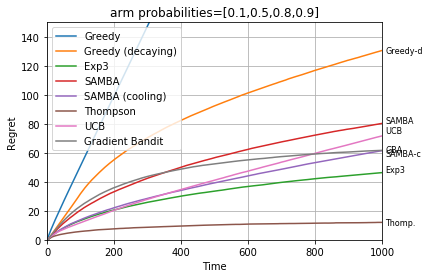

In [784]:
import matplotlib
import matplotlib.pyplot as plt

# Data for plotting
t = np.arange(1, Time+1, 1)
plt.close()
fig, ax = plt.subplots()

ax.plot(Data['Greedy'],label='Greedy')
ax.plot(Data['Greedy_Decay'],label='Greedy (decaying)')
ax.plot(Data['Exp3'],label='Exp3')
ax.plot(Data['Samba'],label='SAMBA')
ax.plot(Data['Samba_Cool'],label='SAMBA (cooling)')
ax.plot(Data['Thompson'],label='Thompson')
ax.plot(Data['UCB'],label='UCB')
ax.plot(Data['GBA'],label='Gradient Bandit')#, t, Ps[0.01], t, Ps[0.1], t, Ps[0.5], t, 100/t)
# ax.loglog(t, Ps[0.01], label='alpha=0.01')
# ax.loglog(t, Ps[0.1], label='alpha=0.1')
# ax.loglog(t, Ps[0.5], label='alpha=0.5')
ax.set(xlabel='Time', ylabel='Regret', title='arm probabilities=[0.1,0.5,0.8,0.9]')
ax.grid()
plt.xlim(0,1000)
plt.ylim(0,150)
#plt.text(1010,Data['Greedy'][-1],'Greedy',fontsize=8)
plt.text(1010,Data['Greedy_Decay'][-1]-1.5,'Greedy-d',fontsize=8)
plt.text(1010,Data['Exp3'][-1],'Exp3',fontsize=8)
plt.text(1010,Data['Samba'][-1],'SAMBA',fontsize=8)
plt.text(1010,Data['Samba_Cool'][-1]-4,'SAMBA-c',fontsize=8)
plt.text(1010,Data['Thompson'][-1]-2,'Thomp.',fontsize=8)
plt.text(1010,Data['UCB'][-1]+2,'UCB',fontsize=8)
plt.text(1010,Data['GBA'][-1]-1,'GBA',fontsize=8)
plt.legend()
#plt.autoscale()

fig.savefig("test.pdf", format='pdf', dpi=1000)
fig.savefig('destination_path.eps', format='eps', dpi=1000)
plt.show()

## 2nd setup
Notes -- Generally methods outperform UCB for small numbers of arms. For larger numbers of arms adaptions to the arguments may be needed.

In [570]:
probs = [ [np.random.rand() for _ in range(2)] for __ in range(200)]

In [685]:
Time = 1000
probs = dict()
for num_arms in [20, 40, 60, 80, 100]:
    probs[num_arms] = [ [np.random.rand()/10 for _ in range(num_arms)] for __ in range(100)]

In [686]:

tic = time()
Thomp_results = []
for num_arms in [20, 40, 60, 80, 100]:
    Thompson_all_rewards = []
    for idx, prob in enumerate(probs[num_arms]):
        rewards = []
        bandit = Thompson_bandit(len(prob))
        Arms = Bernoulli_multiarm(prob)
        for _ in range(Time):
            arm = bandit.act()
            reward = Arms[arm].pull()
            bandit.train(arm,reward)
            rewards.append(np.sum(Arms.rewards()))    
        Thompson_all_rewards.append(rewards)
        print(idx)
        clear_output(wait=True)
    
    print(np.mean([Thompson_all_rewards[i][-1] for i in range(len(Thompson_all_rewards)) ]))
    Thomp_results.append(np.mean([Thompson_all_rewards[i][-1] for i in range(len(Thompson_all_rewards)) ]))
    
toc = time()    
print(toc-tic)
print(np.mean([Thompson_all_rewards[i][-1] for i in range(len(Thompson_all_rewards)) ]))

52.28
59.0161452293396
52.28


In [687]:
Thomp_results

[59.84, 56.28, 55.71, 52.92, 52.28]

In [688]:
tic = time()
ucb_results = []
for num_arms in [20, 40, 60, 80, 100]:

    ucb_all_rewards = []
    for idx, prob in enumerate(probs[num_arms]):
        rewards = []
        bandit = UCB_bandit(len(prob))
        Arms = Bernoulli_multiarm(prob)
        for _ in range(Time):
            arm = bandit.act()
            reward = Arms[arm].pull()
            bandit.train(arm,reward)
            rewards.append(np.sum(Arms.rewards()))    
        ucb_all_rewards.append(rewards)
        print(idx)
        clear_output(wait=True)
        
    print(np.mean([ucb_all_rewards[i][-1] for i in range(len(ucb_all_rewards)) ]))
    ucb_results.append(np.mean([ucb_all_rewards[i][-1] for i in range(len(ucb_all_rewards)) ]))
    
toc = time()    
print(toc-tic)
print(np.mean([ucb_all_rewards[i][-1] for i in range(len(ucb_all_rewards)) ]))

74.71
93.29404973983765
74.71


In [689]:
ucb_results

[59.69, 69.32, 70.71, 73.26, 74.71]

In [690]:
tic = time()
samba_results = []
for num_arms in [20, 40, 60, 80, 100]:

    samba_all_rewards = []
    tic = time()
    for idx, prob in enumerate(probs[num_arms]):
        rewards = []
        bandit = samba_bandit(len(prob),alpha=1.0,cooling=True)
        Arms = Bernoulli_multiarm(prob)
        for _ in range(Time):
            arm = bandit.act()
            reward = Arms[arm].pull()
            bandit.train(arm,reward)
            rewards.append(np.sum(Arms.rewards()))    
        samba_all_rewards.append(rewards)
        print(idx)
        clear_output(wait=True)
        
    print(np.mean([samba_all_rewards[i][-1] for i in range(len(samba_all_rewards)) ]))
    samba_results.append(np.mean([samba_all_rewards[i][-1] for i in range(len(samba_all_rewards)) ]))
    
toc = time()    
print(toc-tic)
print(np.mean([samba_all_rewards[i][-1] for i in range(len(samba_all_rewards)) ]))

53.55
10.318915128707886
53.55


In [691]:
samba_results

[56.7, 53.64, 52.22, 52.76, 53.55]

In [692]:
tic = time()
greedy_results = []
for num_arms in [20, 40, 60, 80, 100]:

    greedy_all_rewards = []
    tic = time()
    for idx, prob in enumerate(probs[num_arms]):
        rewards = []
        bandit = epsilon_greedy_bandit(len(prob),100.,decay=True)
        Arms = Bernoulli_multiarm(prob)
        for _ in range(Time):
            arm = bandit.act()
            reward = Arms[arm].pull()
            bandit.train(arm,reward)
            rewards.append(np.sum(Arms.rewards()))    
        greedy_all_rewards.append(rewards)
        print(idx)
        clear_output(wait=True)
        
    print(np.mean([greedy_all_rewards[i][-1] for i in range(len(greedy_all_rewards)) ]))
    greedy_results.append(np.mean([greedy_all_rewards[i][-1] for i in range(len(greedy_all_rewards)) ]))
    
toc = time()    
print(toc-tic)
print(np.mean([greedy_all_rewards[i][-1] for i in range(len(greedy_all_rewards)) ]))

63.53
4.822667121887207
63.53


In [693]:
greedy_results

[64.0, 63.41, 66.23, 63.28, 63.53]

In [694]:
tic = time()
exp3_results = []
for num_arms in [20, 40, 60, 80, 100]:

    exp3_all_rewards = []
    tic = time()
    for idx, prob in enumerate(probs[num_arms]):
        rewards = []
        bandit = exp3_bandit(len(prob))
        Arms = Bernoulli_multiarm(prob)
        for _ in range(Time):
            arm = bandit.act()
            reward = Arms[arm].pull()
            bandit.train(arm,reward)
            rewards.append(np.sum(Arms.rewards()))    
        exp3_all_rewards.append(rewards)
        print(idx)
        clear_output(wait=True)
        
    print(np.mean([exp3_all_rewards[i][-1] for i in range(len(exp3_all_rewards)) ]))
    exp3_results.append(np.mean([exp3_all_rewards[i][-1] for i in range(len(exp3_all_rewards)) ]))



51.58


In [695]:
exp3_results

[54.06, 53.64, 52.49, 52.93, 51.58]

In [696]:
tic = time()
samba1_results = []
for num_arms in [20, 40, 60, 80, 100]:
    
    samba1_all_rewards = []
    tic = time()
    for idx, prob in enumerate(probs[num_arms]):
        rewards = []
        bandit = samba_bandit(len(prob),alpha=0.1)
        Arms = Bernoulli_multiarm(prob)
        for _ in range(Time):
            arm = bandit.act()
            reward = Arms[arm].pull()
            bandit.train(arm,reward)
            rewards.append(np.sum(Arms.rewards()))    
        samba1_all_rewards.append(rewards)
        print(idx)
        clear_output(wait=True)
    
    print(np.mean([samba1_all_rewards[i][-1] for i in range(len(samba1_all_rewards)) ]))
    samba1_results.append(np.mean([samba1_all_rewards[i][-1] for i in range(len(samba1_all_rewards)) ]))
    
toc = time()    
print(toc-tic)
print(np.mean([samba1_all_rewards[i][-1] for i in range(len(samba1_all_rewards)) ]))

50.8
10.090417861938477
50.8


In [697]:
samba1_results

[54.27, 52.14, 51.76, 50.99, 50.8]

In [698]:
tic = time()
sambam_results = []
for num_arms in [20, 40, 60, 80, 100]:
    
    sambam_all_rewards = []
    tic = time()
    for idx, prob in enumerate(probs[num_arms]):
        rewards = []
        bandit = samba_bandit_metropolis(len(prob),alpha=2.0,cooling=True)
        Arms = Bernoulli_multiarm(prob)
        for _ in range(Time):
            arm = bandit.act()
            reward = Arms[arm].pull()
            bandit.train(arm,reward)
            rewards.append(np.sum(Arms.rewards()))    
        sambam_all_rewards.append(rewards)
        print(idx)
        clear_output(wait=True)
    
    print(np.mean([sambam_all_rewards[i][-1] for i in range(len(sambam_all_rewards)) ]))
    sambam_results.append(np.mean([sambam_all_rewards[i][-1] for i in range(len(sambam_all_rewards)) ]))
    
toc = time()    
print(toc-tic)
print(np.mean([sambam_all_rewards[i][-1] for i in range(len(sambam_all_rewards)) ]))

53.07
6.525552034378052
53.07


In [699]:
sambam_results

[59.47, 56.4, 55.32, 54.07, 53.07]

In [700]:
tic = time()
GBA_results = []
for num_arms in [20, 40, 60, 80, 100]:

    GBA_all_rewards = []
    tic = time()
    for idx, prob in enumerate(probs[num_arms]):
        rewards = []
        bandit = Gradient_Bandit_Algorithm(len(prob),alpha=0.1)
        Arms = Bernoulli_multiarm(prob)
        for _ in range(Time):
            arm = bandit.act()
            reward = Arms[arm].pull()
            bandit.train(arm,reward)
            rewards.append(np.sum(Arms.rewards()))    
        GBA_all_rewards.append(rewards)
        print(idx)
        clear_output(wait=True)

    print(np.mean([GBA_all_rewards[i][-1] for i in range(len(GBA_all_rewards)) ]))
    GBA_results.append(np.mean([GBA_all_rewards[i][-1] for i in range(len(GBA_all_rewards)) ]))
        
toc = time()    
print(toc-tic)
print(np.mean([GBA_all_rewards[i][-1] for i in range(len(GBA_all_rewards)) ]))

50.1
9.105292081832886
50.1


In [701]:
GBA_results

[52.84, 51.0, 50.73, 49.97, 50.1]

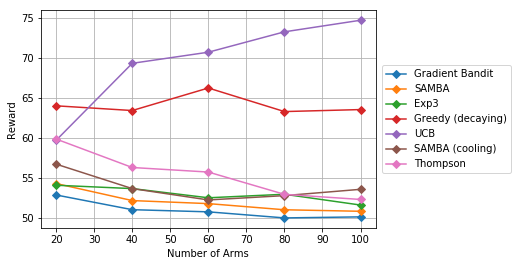

In [788]:
import matplotlib
import matplotlib.pyplot as plt

# Data for plotting
t = np.arange(1, Time+1, 1)

fig, ax = plt.subplots()
ax.plot([20, 40, 60, 80, 100], GBA_results, label='Gradient Bandit', marker="D")
ax.plot([20, 40, 60, 80, 100], samba1_results, label='SAMBA', marker="D")
ax.plot([20, 40, 60, 80, 100], exp3_results, label='Exp3', marker="D")
ax.plot([20, 40, 60, 80, 100], greedy_results, label='Greedy (decaying)', marker="D")
ax.plot([20, 40, 60, 80, 100], ucb_results, label='UCB', marker="D")
ax.plot([20, 40, 60, 80, 100], samba_results, label='SAMBA (cooling)', marker="D")
ax.plot([20, 40, 60, 80, 100], Thomp_results, label='Thompson', marker="D")


ax.set(xlabel='Number of Arms', ylabel='Reward')
ax.grid()
plt.legend(loc='center right',bbox_to_anchor=(1.42, 0.5))

fig.savefig("test.png",dpi=1000,bbox_inches='tight')
fig.savefig('destination_path.eps', format='eps', dpi=1000, bbox_inches='tight')
fig.savefig('destination_path.pdf', format='pdf', dpi=1000, bbox_inches='tight')
plt.show()

# Switch

In [746]:
Time = 1000
num_experiments = 1000
probs = np.array([0.1,0.1,0.1,0.9])
probs2 = np.array([0.9,0.1,0.1,0.1])
Data = dict()

In [747]:
All_rewards = np.zeros(Time)
for __ in range(num_experiments):
    bandit = epsilon_greedy_bandit(4,.1)
    Arms = Bernoulli_multiarm(probs)
    rewards = []
    tot_reward = 0.
    for t in range(Time):
        arm = bandit.act()
        reward = Arms[arm].pull()
        bandit.train(arm,reward)
        
        if t == 500 :
            Arms = Bernoulli_multiarm(probs2)

        tot_reward += reward
        rewards.append(tot_reward)
    All_rewards += np.array(rewards)
    print(__,'/',num_experiments)
    clear_output(wait=True)
    
Av_rewards = All_rewards/num_experiments
Regret = [ np.max(probs)*t - av for t, av in enumerate(Av_rewards)]
Data['Greedy']=Regret
print(Regret[-1])

437.466


In [748]:

All_rewards = np.zeros(Time)

for __ in range(num_experiments):
    bandit = epsilon_greedy_bandit(4,100.,decay=True)
    Arms = Bernoulli_multiarm(probs)
    rewards = []
    tot_reward = 0.
    for _ in range(Time):
        arm = bandit.act()
        reward = Arms[arm].pull()
        bandit.train(arm,reward)
        
        if t == 500 :
            Arms = Bernoulli_multiarm(probs2)

        tot_reward += reward
        rewards.append(tot_reward)
    All_rewards += np.array(rewards)
    print(__,'/',num_experiments)
    clear_output(wait=True)
    
Av_rewards = All_rewards/num_experiments
Regret = [ np.max(probs)*t - av for t, av in enumerate(Av_rewards)]
print(Regret[-1])
Data['Greedy_Decay']=Regret

197.96400000000006


In [749]:

All_rewards = np.zeros(Time)

for __ in range(num_experiments):
    bandit = exp3_bandit(4)
    Arms = Bernoulli_multiarm(probs)
    rewards = []
    tot_reward = 0.
    for _ in range(Time):

        arm = bandit.act()
        reward = Arms[arm].pull()
        bandit.train(arm,reward)
        
        if t == 500 :
            Arms = Bernoulli_multiarm(probs2)

        tot_reward += reward
        rewards.append(tot_reward)
    All_rewards += np.array(rewards)
    print(__,'/',num_experiments)
    clear_output(wait=True)
    
Av_rewards = All_rewards/num_experiments
Regret = [ np.max(probs)*t - av for t, av in enumerate(Av_rewards)]
print(Regret[-1])
Data['Exp3']=Regret

35.111999999999966


In [750]:

All_rewards = np.zeros(Time)

for __ in range(num_experiments):
    bandit = samba_bandit(4,alpha=0.1)
    Arms = Bernoulli_multiarm(probs)
    rewards = []
    tot_reward = 0.
    for _ in range(Time):
        arm = bandit.act()
        reward = Arms[arm].pull()
        bandit.train(arm,reward)
        
        if t == 500 :
            Arms = Bernoulli_multiarm(probs2)
        
        tot_reward += reward
        rewards.append(tot_reward)
    All_rewards += np.array(rewards)
    print(__,'/',num_experiments)
    clear_output(wait=True)
    
Av_rewards = All_rewards/num_experiments
Regret = [ np.max(probs)*t - av for t, av in enumerate(Av_rewards)]
print(Regret[-1])
Data['Samba']=Regret

92.47000000000003


In [751]:

All_rewards = np.zeros(Time)

for __ in range(num_experiments):
    bandit = samba_bandit(4,alpha=1.0,cooling=True)
    Arms = Bernoulli_multiarm(probs)
    rewards = []
    tot_reward = 0.
    for _ in range(Time):
        arm = bandit.act()
        reward = Arms[arm].pull()
        bandit.train(arm,reward)
        
        if t == 500 :
            Arms = Bernoulli_multiarm(probs2)

        tot_reward += reward
        rewards.append(tot_reward)
    All_rewards += np.array(rewards)
    print(__,'/',num_experiments)
    clear_output(wait=True)

Av_rewards = All_rewards/num_experiments
Regret = [ np.max(probs)*t - av for t, av in enumerate(Av_rewards)]
print(Regret[-1])
Data['Samba_Cool']=Regret

46.88200000000006


In [752]:

All_rewards = np.zeros(Time)

for __ in range(num_experiments):
    bandit = Thompson_bandit(4)
    Arms = Bernoulli_multiarm(probs)
    rewards = []
    tot_reward = 0.
    for _ in range(Time):
        arm = bandit.act()
        reward = Arms[arm].pull()
        bandit.train(arm,reward)
        
        if t == 500 :
            Arms = Bernoulli_multiarm(probs2)

        tot_reward += reward
        rewards.append(tot_reward)
    All_rewards += np.array(rewards)
    print(__,'/',num_experiments)
    clear_output(wait=True)

Av_rewards = All_rewards/num_experiments
Regret = [ np.max(probs)*t - av for t, av in enumerate(Av_rewards)]
print(Regret[-1])
Data['Thompson']=Regret

6.97199999999998


In [753]:

All_rewards = np.zeros(Time)
probs = np.array(probs)

for __ in range(num_experiments):
    bandit = UCB_bandit(4)
    Arms = Bernoulli_multiarm(probs)
    rewards = []
    tot_reward = 0.
    for _ in range(Time):
        arm = bandit.act()
        reward = Arms[arm].pull()
        bandit.train(arm,reward)
        
        if t == 500 :
            Arms = Bernoulli_multiarm(probs2)

        tot_reward += reward
        rewards.append(tot_reward)
    All_rewards += np.array(rewards)
    print(__,'/',num_experiments)
    clear_output(wait=True)

Av_rewards = All_rewards/num_experiments
Regret = [ np.max(probs)*t - av for t, av in enumerate(Av_rewards)]
print(Regret[-1])
Data['UCB']=Regret

82.32500000000005


In [754]:

All_rewards = np.zeros(Time)

for __ in range(num_experiments):
    bandit = Gradient_Bandit_Algorithm(4,0.1)
    Arms = Bernoulli_multiarm(probs)
    rewards = []
    tot_reward = 0.
    for _ in range(Time):
        arm = bandit.act()
        reward = Arms[arm].pull()
        bandit.train(arm,reward)
        
        if t == 500 :
            Arms = Bernoulli_multiarm(probs2)

        tot_reward += reward
        rewards.append(tot_reward)
    All_rewards += np.array(rewards)
    print(__,'/',num_experiments)
    clear_output(wait=True)

Av_rewards = All_rewards/num_experiments
Regret = [ np.max(probs)*t - av for t, av in enumerate(Av_rewards)]
print(Regret[-1])
Data['GBA']=Regret

67.78399999999999


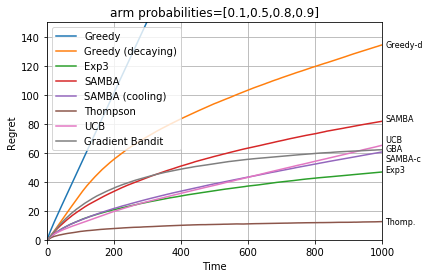

In [569]:
import matplotlib
import matplotlib.pyplot as plt

# Data for plotting
t = np.arange(1, Time+1, 1)
plt.close()
fig, ax = plt.subplots()

ax.plot(Data['Greedy'],label='Greedy')
ax.plot(Data['Greedy_Decay'],label='Greedy (decaying)')
ax.plot(Data['Exp3'],label='Exp3')
ax.plot(Data['Samba'],label='SAMBA')
ax.plot(Data['Samba_Cool'],label='SAMBA (cooling)')
ax.plot(Data['Thompson'],label='Thompson')
ax.plot(Data['UCB'],label='UCB')
ax.plot(Data['GBA'],label='Gradient Bandit')#, t, Ps[0.01], t, Ps[0.1], t, Ps[0.5], t, 100/t)
# ax.loglog(t, Ps[0.01], label='alpha=0.01')
# ax.loglog(t, Ps[0.1], label='alpha=0.1')
# ax.loglog(t, Ps[0.5], label='alpha=0.5')
ax.set(xlabel='Time', ylabel='Regret', title='arm probabilities=[0.1,0.5,0.8,0.9]')
ax.grid()
plt.xlim(0,1000)
plt.ylim(0,150)
#plt.text(1010,Data['Greedy'][-1],'Greedy',fontsize=8)
plt.text(1010,Data['Greedy_Decay'][-1]-1.5,'Greedy-d',fontsize=8)
plt.text(1010,Data['Exp3'][-1],'Exp3',fontsize=8)
plt.text(1010,Data['Samba'][-1],'SAMBA',fontsize=8)
plt.text(1010,Data['Samba_Cool'][-1]-6,'SAMBA-c',fontsize=8)
plt.text(1010,Data['Thompson'][-1]-2,'Thomp.',fontsize=8)
plt.text(1010,Data['UCB'][-1]+2,'UCB',fontsize=8)
plt.text(1010,Data['GBA'][-1]-1,'GBA',fontsize=8)
plt.legend()
#plt.autoscale()

fig.savefig("test.png")
fig.savefig('destination_path.eps', format='eps', dpi=1000)
plt.show()

# Final Perturb Experiment

## Debug

Works really good for 2 arms

In [261]:
samba_all_rewards = []
tic = time()
for idx, prob in enumerate(probs):
    rewards = []
    bandit = samba_bandit(len(prob),alpha=3.0,cooling=True)
    Arms = Bernoulli_multiarm(prob)
    for _ in range(50): 
        arm = bandit.act()
        reward = Arms[arm].pull()
        print(arm,reward)
        bandit.train(arm,reward)
        rewards.append(np.sum(Arms.rewards()))    
        print(bandit.probs)
    samba_all_rewards.append(rewards)
    print(idx)
    clear_output(wait=True)
    
toc = time()    
print(toc-tic)
print(np.mean([samba_all_rewards[i][-1] for i in range(len(samba_all_rewards)) ]))

7 1.0
[0.00916207 0.1        0.1        0.1        0.1        0.1
 0.1        0.19083793 0.1        0.1       ]
5 1.0
[0.00916207 0.1        0.1        0.1        0.1        0.19083793
 0.1        0.1        0.1        0.1       ]
5 0.0
[0.00916207 0.1        0.1        0.1        0.1        0.19083793
 0.1        0.1        0.1        0.1       ]
3 1.0
[0.00916207 0.1        0.1        0.19083793 0.1        0.1
 0.1        0.1        0.1        0.1       ]
2 1.0
[0.00916207 0.1        0.19083793 0.1        0.1        0.1
 0.1        0.1        0.1        0.1       ]
8 0.0
[0.00916207 0.1        0.19083793 0.1        0.1        0.1
 0.1        0.1        0.1        0.1       ]
2 1.0
[0.00893026 0.05240048 0.57186587 0.05240048 0.05240048 0.05240048
 0.05240048 0.05240048 0.05240048 0.05240048]
9 1.0
[0.00893026 0.05240048 0.53205633 0.05240048 0.05240048 0.05240048
 0.05240048 0.05240048 0.05240048 0.09221002]
8 0.0
[0.00893026 0.05240048 0.53205633 0.05240048 0.05240048 0.05240048
 0.

/Users/mbbssnw3/Dropbox (The University of Manchester)/ACTIVE/PROG/Bandits/bandits.py:186: RuntimeWarning: invalid value encountered in log
  self.alphas = self.alpha / (1-np.log(self.probs))


ValueError: probabilities are not non-negative

In [409]:
probs = [ [np.random.rand() for _ in range(100)] for __ in range(10)]

In [410]:
#alphas = [0.85,0.5,0.2,0.1,0.01]
alphas = [0.99,0.95,0.90,0.85,0.75,0.5,0.2,0.1,0.01]
alphas = [0.1]

for alf in alphas:
    samba_all_rewards = []
    tic = time()
    for idx, prob in enumerate(probs):
        rewards = []
        bandit = samba_bandit(len(prob),alpha=alf)#,cooling=True)
        Arms = Bernoulli_multiarm(prob)
        for _ in range(10000):
            arm = bandit.act()
            reward = Arms[arm].pull()
            bandit.train(arm,reward)
            rewards.append(np.sum(Arms.rewards()))    
        samba_all_rewards.append(rewards)
#         print(idx)
#         clear_output(wait=True)

    toc = time()    
    print(toc-tic)
    print(alf, np.mean([samba_all_rewards[i][-1] for i in range(len(samba_all_rewards)) ]))

7.905816078186035
0.1 7738.6


In [414]:
#alphas = [0.85,0.5,0.2,0.1,0.01]

alphas = [0.99,0.95,0.90,0.85,0.75,0.5,0.2,0.1,0.01]
alphas = [1.6]
tot_time = 10000
for alf in alphas:
    samba_all_rewards = []
    tic = time()
    for idx, prob in enumerate(probs):
        rewards = []
        bandit = samba_bandit(len(prob),alpha=alf,cooling=True)
        Arms = Bernoulli_multiarm(prob)
        for i in range(tot_time):
            arm = bandit.act()
            reward = Arms[arm].pull()
            bandit.train(arm,reward)
            rewards.append(np.sum(Arms.rewards()))  
            #print(i,bandit.alphas)
        samba_all_rewards.append(rewards)
#         print(idx)
#         clear_output(wait=True)
        
    toc = time()    
    print(toc-tic)
    print(alf, np.mean([samba_all_rewards[i][-1] for i in range(len(samba_all_rewards)) ]))

8.670617818832397
1.6 8411.9


In [412]:
Thompson_all_rewards = []
tic = time()
for idx, prob in enumerate(probs):
    rewards = []
    bandit = Thompson_bandit(len(prob))
    Arms = Bernoulli_multiarm(prob)
    for _ in range(10000):
        arm = bandit.act()
        reward = Arms[arm].pull()
        bandit.train(arm,reward)
        rewards.append(np.sum(Arms.rewards()))    
    Thompson_all_rewards.append(rewards)
    print(idx)
    clear_output(wait=True)
    
toc = time()    
print(toc-tic)
print(np.mean([Thompson_all_rewards[i][-1] for i in range(len(Thompson_all_rewards)) ]))

14.682996034622192
9701.0


In [413]:
ucb_all_rewards = []
tic = time()
for idx, prob in enumerate(probs):
    rewards = []
    bandit = UCB_bandit(len(prob))
    Arms = Bernoulli_multiarm(prob)
    for _ in range(10000):
        arm = bandit.act()
        reward = Arms[arm].pull()
        bandit.train(arm,reward)
        rewards.append(np.sum(Arms.rewards()))    
    ucb_all_rewards.append(rewards)
    print(idx)
    clear_output(wait=True)
    
toc = time()    
print(toc-tic)
print(np.mean([ucb_all_rewards[i][-1] for i in range(len(ucb_all_rewards)) ]))

25.503042697906494
9581.6


What about more arms?

In [50]:
probs = [ [np.random.rand() for _ in range(100)] for __ in range(20)]

In [382]:
#alphas = [0.85,0.5,0.2,0.1,0.01]
alphas = [0.99,0.95,0.90,0.85,0.75,0.5,0.2,0.1,0.01]

for alf in alphas:
    samba_all_rewards = []
    tic = time()
    for idx, prob in enumerate(probs):
        rewards = []
        bandit = samba_bandit(len(prob),alpha=alf)#,cooling=True)
        Arms = Bernoulli_multiarm(prob)
        for _ in range(10000):
            arm = bandit.act()
            reward = Arms[arm].pull()
            bandit.train(arm,reward)
            rewards.append(np.sum(Arms.rewards()))    
        samba_all_rewards.append(rewards)
#         print(idx)
#         clear_output(wait=True)

    toc = time()    
    print(toc-tic)
    print(alf, np.mean([samba_all_rewards[i][-1] for i in range(len(samba_all_rewards)) ]))

8.264143705368042
0.99 7286.8
6.710864067077637
0.95 7675.5
6.699939727783203
0.9 7627.8
6.679640054702759
0.85 7940.7
6.766922950744629
0.75 8085.8
6.725687026977539
0.5 8283.9
6.6591691970825195
0.2 8195.4
7.013772964477539
0.1 8209.0
7.401365041732788
0.01 7808.2


In [383]:
#alphas = [0.85,0.5,0.2,0.1,0.01]
alphas = [0.99,0.95,0.90,0.85,0.75,0.5,0.2,0.1,0.01]
alphas = [1.6,1.]

for alf in alphas:
    samba_all_rewards = []
    tic = time()
    for idx, prob in enumerate(probs):
        rewards = []
        bandit = samba_bandit(len(prob),alpha=alf,cooling=True)
        Arms = Bernoulli_multiarm(prob)
        for _ in range(10000):
            arm = bandit.act()
            reward = Arms[arm].pull()
            bandit.train(arm,reward)
            rewards.append(np.sum(Arms.rewards()))    
        samba_all_rewards.append(rewards)
#         print(idx)
#         clear_output(wait=True)

    toc = time()    
    print(toc-tic)
    print(alf, np.mean([samba_all_rewards[i][-1] for i in range(len(samba_all_rewards)) ]))

7.7236950397491455
1.6 7937.1
7.3757030963897705
1.0 8058.9


In [384]:
Thompson_all_rewards = []
tic = time()
for idx, prob in enumerate(probs):
    rewards = []
    bandit = Thompson_bandit(len(prob))
    Arms = Bernoulli_multiarm(prob)
    for _ in range(10000):
        arm = bandit.act()
        reward = Arms[arm].pull()
        bandit.train(arm,reward)
        rewards.append(np.sum(Arms.rewards()))    
    Thompson_all_rewards.append(rewards)
    print(idx)
    clear_output(wait=True)
    
toc = time()    
print(toc-tic)
print(np.mean([Thompson_all_rewards[i][-1] for i in range(len(Thompson_all_rewards)) ]))

2.5885050296783447
8266.7


In [385]:
ucb_all_rewards = []
tic = time()
for idx, prob in enumerate(probs):
    rewards = []
    bandit = UCB_bandit(len(prob))
    Arms = Bernoulli_multiarm(prob)
    for _ in range(10000):
        arm = bandit.act()
        reward = Arms[arm].pull()
        bandit.train(arm,reward)
        rewards.append(np.sum(Arms.rewards()))    
    ucb_all_rewards.append(rewards)
    print(idx)
    clear_output(wait=True)
    
toc = time()    
print(toc-tic)
print(np.mean([ucb_all_rewards[i][-1] for i in range(len(ucb_all_rewards)) ]))

3.362407922744751
7034.2


In [ ]:
print(np.mean(all_rewards[-1]))

# Bandit class structure

In [70]:
import numpy as np

In [105]:
class samba_bandit:
    ''' Stochastic approximation multi-arm bandit algorithm (sambsa)
    
    Summary: 
        A stochastic approximation algorithm for multi-arm bandits.
        
    Arguments:
        num_actions -- number of actions/arms (int)
        
    Additional Arguments:
        alpha -- learning rate between 0 and 1 (float)
        cooling -- apply cooling to learning rate (bool)

    Methods: 
        act()             -- returns arm index (int)
        train(arm,reward) -- add to rewards of arm   
    '''
    
    def __init__(self, num_actions, alpha=0.1, cooling=False):
        self.num_arms = num_actions
        self.probs = np.ones(self.num_arms)/self.num_arms
        self.alpha = alpha
        if cooling :
            self.alphas = self.alpha / (1+np.log(self.probs))
        else:
            self.alphas = self.alpha * np.ones(self.num_arms)
            
        
    def train(self,arm,reward):
        arm_star = np.argmax(self.probs)
        p_star = self.probs[arm_star]
        
        if arm == arm_star :
            self.probs -= self.alphas * self.probs * reward / p_star
        else :
            self.probs[arm] += self.alphas[arm] * self.probs[arm] * reward
        self.probs[arm_star] = 1-np.sum(np.delete(self.probs, arm_star, 0))
        
        if cooling :
            self.alphas = self.alpha / (1+np.log(self.probs))
        
    def act(self):
        return np.random.choice(self.num_actions,p=self.probs)
            

In [ ]:
class samba_cool_bandit:
    ''' Stochastic approximation multi-arm bandit algorithm with parameter cooling
        (samba cool)
    
    Summary: 
        A stochastic approximation algorithm for multi-arm bandits.
        Applies parameter alpha[arm] = beta / (1+log(prob[arm]))
        
    Arguments:
        num_actions -- number of actions/arms (int)

    Methods: 
        act()             -- returns arm index (int)
        train(arm,reward) -- add to rewards of arm   
    '''
    
    def __init__(self, num_actions, beta=0.5):
        self.num_arms = num_actions
        self.probs = np.ones(self.num_arms)/self.num_arms
        self.beta = beta
        self.alphas = self.beta / (1+np.log(self.probs))
        
    def train(self,arm,reward):
        arm_star = np.argmax(self.probs)
        p_star = self.probs[arm_star]
        if arm == arm_star :
            self.probs -= self.alphas * self.probs * reward / p_star
        else :
            self.probs[arm] += self.alphas[arm] * self.probs[arm] * reward
        self.probs[arm_star] = 1-np.sum(np.delete(self.probs, arm_star, 0))
        self.alphas = self.beta / (1+np.log(self.probs))
        
    def act(self):
        return np.random.choice(self.num_actions,p=self.probs)
    

# SAMBA bandit

In [31]:
import numpy as np
from time import time
from IPython import display

In [ ]:
class samba_bandit:
    
    def __init__(self,prob):

In [32]:
class arm():   
    
    def __init__(self,theta,Prob):
        self.theta=theta
        self.Prob=Prob
        
    def pull(self):
        if np.random.random() < self.theta :
            return 1.
        else :
            return 0.

In [33]:
N = 10
Arms = [arm(q/2,1/(N)) for q in np.arange(0,1,1/N)]
Time=100000 # Takes about 2 minutes to run

In [34]:
[arms.Prob for arms in Arms]

[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

In [35]:
[arms.theta for arms in Arms]

[0.0,
 0.05,
 0.1,
 0.15000000000000002,
 0.2,
 0.25,
 0.30000000000000004,
 0.35000000000000003,
 0.4,
 0.45]

In [36]:
0.05/0.45

0.11111111111111112

In [37]:
action = np.random.choice(range(len(Arms)), p=[a.Prob for a in Arms])

In [38]:
tic = time()
Prob = np.ones(N)/N
Ps = []
Rewards = []
Count = np.zeros(N)
alpha = 0.1

In [39]:
for t in range(Time):
    Arms.sort(key=lambda x: x.Prob)
    action = np.random.choice(range(len(Prob)), p=[a.Prob for a in Arms])
    R = Arms[action].pull()
    
    if action == N-1 :
        D = 0.
        for i in range(N-1):
            d = alpha * (Arms[i].Prob)**2 * R / Arms[N-1].Prob
            Arms[i].Prob = Arms[i].Prob - d
            D +=d  
        Arms[N-1].Prob = Arms[N-1].Prob + D     
    else:    
        d = alpha * (Arms[action].Prob) * R 
        Arms[action].Prob = Arms[action].Prob + d
        Arms[N-1].Prob = Arms[N-1].Prob - d
    
   # print([arms.Prob for arms in Arms])
    Ps.append(1-Arms[-1].Prob)
    Count[action] +=1
    if t % 5000 == 0 :
        print(t)
        display.clear_output(wait=True)
print(time()-tic)

5.409856081008911


In [40]:
Arms[-1].Prob

0.9958912452689692

In [41]:
print([(np.round(arms.Prob,4), arms.theta  ) for arms in Arms])

[(0.0002, 0.0), (0.0002, 0.05), (0.0003, 0.2), (0.0003, 0.15000000000000002), (0.0003, 0.1), (0.0004, 0.30000000000000004), (0.0006, 0.35000000000000003), (0.0007, 0.25), (0.0011, 0.4), (0.9959, 0.45)]


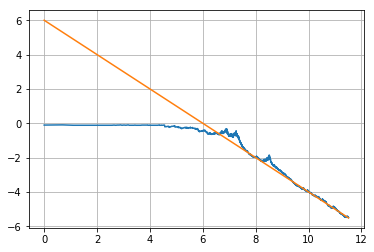

In [42]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = np.arange(1, Time+1, 1)

fig, ax = plt.subplots()
ax.plot(np.log(t), np.log(Ps), np.log(t), 6-1*np.log(t))

#ax.set(xlabel='time (s)', ylabel='voltage (mV)',
#       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.show()

In [44]:
np.exp(6)

403.4287934927351

In [43]:
for idx, arms in enumerate(Arms):
    print(arms.theta,arms.Prob)

0.0 0.00022126176130531173
0.05 0.00023337753953550725
0.2 0.0002605957395306399
0.15000000000000002 0.00027692581739312906
0.1 0.00028848999923548587
0.30000000000000004 0.00043126937419586767
0.35000000000000003 0.0005607288102733525
0.25 0.0006876727378383839
0.4 0.001148432951709333
0.45 0.9958912452689692


In [29]:
np.exp(6)

403.4287934927351